In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
(train_images, train_labels), (test_images, test_labels)	= tf.keras.datasets.mnist.load_data()

In [3]:
print(train_images)
print(type(train_images))  

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
<class 'numpy.ndarray'>


In [4]:
print(train_labels)
print(type(train_labels))  

[5 0 4 ... 5 6 8]
<class 'numpy.ndarray'>


In [5]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


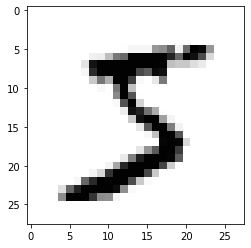

In [6]:
plt.imshow(train_images[0], cmap="Greys")

In [7]:
train_images = train_images.reshape((60000, 784))
train_images = train_images/ 255.0

test_images = test_images.reshape((10000, 784))
test_images = test_images/ 255.0

In [8]:
print(train_images[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [9]:
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)
print(train_labels.shape)
print(train_labels)

(60000, 10)
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [10]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64, activation='relu', input_dim=784))
model.add(tf.keras.layers.Dense(10, activation='sigmoid'))

In [11]:
model.compile(optimizer='rmsprop',
                loss='mse',
                metrics=['accuracy'])      

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [13]:
print(784*64+64)
print(64*10+10)


50240
650


In [14]:
history = model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 7ms/step - loss: 0.0256 - accuracy: 0.8708
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0113 - accuracy: 0.9395
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0087 - accuracy: 0.9526
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0072 - accuracy: 0.9612
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0063 - accuracy: 0.9664


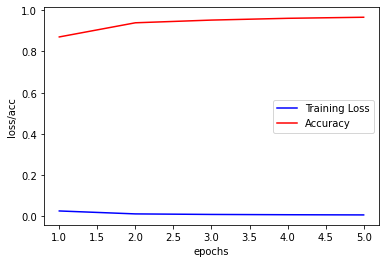

In [15]:
loss = history.history['loss']
acc = history.history['accuracy']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, acc, 'r', label='Accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss/acc')
plt.show()

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('테스트 정확도:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0064 - accuracy: 0.9672
테스트 정확도: 0.967199981212616


In [17]:
from google.colab import files
uploaded = files.upload()

Saving test.png to test.png


In [18]:
#불러올 파일의 경로를 filename 변수에 저장
filename = 'test.png'

In [19]:
import cv2 as cv

image = cv.imread(filename, cv.IMREAD_GRAYSCALE)
image = cv.resize(image, (28, 28))


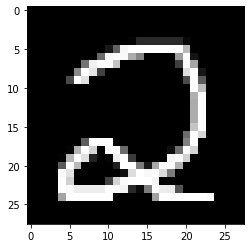

In [20]:
plt.imshow(image.reshape(28, 28),cmap='Greys')
plt.show()

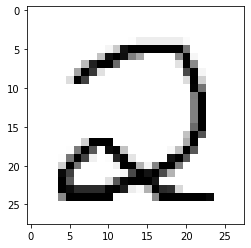

In [21]:
image = image.astype('float32')
#image = image.reshape(1, 784)
image = 255-image
image /= 255.0

plt.imshow(image.reshape(28, 28),cmap='Greys')
plt.show()

In [22]:
pred = model.predict(image.reshape(1, 784), batch_size=1)
print(pred)
print("추정된 숫자=", pred.argmax())

1/1 [==============================] - 0s 73ms/step
[[3.0961096e-01 8.5223348e-08 5.0523835e-01 1.9359693e-02 2.8887741e-09
  2.2810521e-03 1.3109807e-05 5.6146993e-05 2.5438934e-04 6.5612236e-09]]
추정된 숫자= 2


In [23]:
from google.colab import files
uploaded = files.upload()

Saving 테스트이미지2.png to 테스트이미지2.png


In [24]:
filename = '테스트이미지2.png'

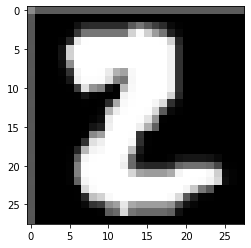

In [25]:
import cv2 as cv

image = cv.imread(filename, cv.IMREAD_GRAYSCALE)
image = cv.resize(image, (28, 28))
plt.imshow(image.reshape(28, 28),cmap='Greys')
plt.show()

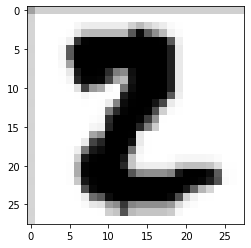

In [26]:
image = image.astype('float32')
#image = image.reshape(1, 784)
image = 255-image
image /= 255.0

plt.imshow(image.reshape(28, 28),cmap='Greys')
plt.show()

In [27]:
pred = model.predict(image.reshape(1, 784), batch_size=1)
print(pred)
print("추정된 숫자=", pred.argmax())

1/1 [==============================] - 0s 18ms/step
[[7.41194910e-08 3.09075010e-12 7.83108652e-01 8.11158586e-03
  9.66998714e-24 2.55788701e-09 1.28220825e-13 3.84154751e-14
  1.21062556e-04 3.25044997e-14]]
추정된 숫자= 2


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 테스트이미지3.png to 테스트이미지3 (1).png


In [ ]:
#불러올 파일의 경로를 filename 변수에 저장
filename = '테스트이미지3.png'

In [ ]:
import cv2 as cv

image = cv.imread(filename, cv.IMREAD_GRAYSCALE)
image = cv.resize(image, (28, 28))


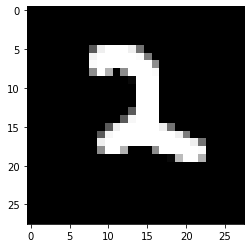

In [ ]:
plt.imshow(image.reshape(28, 28),cmap='Greys')
plt.show()

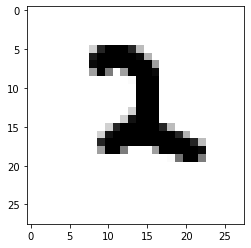

In [ ]:
image = image.astype('float32')
#image = image.reshape(1, 784)
image = 255-image
image /= 255.0

plt.imshow(image.reshape(28, 28),cmap='Greys')
plt.show()

In [ ]:
pred = model.predict(image.reshape(1, 784), batch_size=1)
print(pred)
print("추정된 숫자=", pred.argmax())

[[1.0494875e-07 3.5089254e-04 4.0837252e-01 3.4542245e-01 2.5010109e-04
  9.6180374e-06 1.9909166e-05 4.4504613e-02 2.4952590e-03 1.5715659e-03]]
추정된 숫자= 2
